In [2]:
# Upload Database
from google.colab import files
uploaded = files.upload()

Saving SRSN.csv to SRSN.csv


In [63]:
import pandas as pd

df = pd.read_csv('SRSN.csv')

In [64]:
df.head()

,timestamp,open,low,high,close,volume
0,2001-04-16,413,346,413,373,0
1,2001-04-17,413,346,413,373,0
2,2001-04-18,413,346,413,373,0
3,2001-04-19,413,346,413,373,0
4,2001-04-20,413,346,413,373,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  5670 non-null   object
 1   open       5670 non-null   int64 
 2   low        5670 non-null   int64 
 3   high       5670 non-null   int64 
 4   close      5670 non-null   int64 
 5   volume     5670 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 265.9+ KB


In [66]:
# Konversi kolom 'timestamp' menjadi datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
data = df.sort_values(by='timestamp')

In [67]:
# Tentukan proporsi pembagian data
proporsi_pelatihan = 0.7
proporsi_validasi = 0.15
proporsi_pengujian = 0.15

In [68]:
# Hitung indeks untuk membagi dataset
jumlah_data = len(data)
indeks_pelatihan = int(jumlah_data * proporsi_pelatihan)
indeks_validasi = int(jumlah_data * (proporsi_pelatihan + proporsi_validasi))

In [88]:
# Bagi dataset menjadi data pelatihan, validasi, dan pengujian
data_pelatihan = data[:indeks_pelatihan]
data_validasi = data[indeks_pelatihan:indeks_validasi]
data_pengujian = data[indeks_validasi:]

In [87]:
# Menggunakan kolom numerik untuk normalisasi
data_numerik = data_pelatihan[['open', 'low','high', 'close', 'volume']]

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_numerik)

In [72]:
from joblib import dump
# Menyimpan scaler ke dalam file
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [73]:
# Kolom timestamp (waktu) yang tidak perlu dinormalisasi
timestamp = data_pelatihan['timestamp']

In [74]:
# Simpan data yang telah dinormalisasi dan kolom timestamp terpisah
data_normalized_df = pd.DataFrame(data_normalized, columns=['open', 'low','high', 'close', 'volume'])
data_normalized_df['timestamp'] = timestamp

In [75]:
# Simpan data yang telah dinormalisasi dan kolom timestamp ke dalam file jika perlu
data_normalized_df.to_csv("data_normalized.csv", index=False)

In [76]:
data_plot = pd.read_csv('data_normalized.csv')

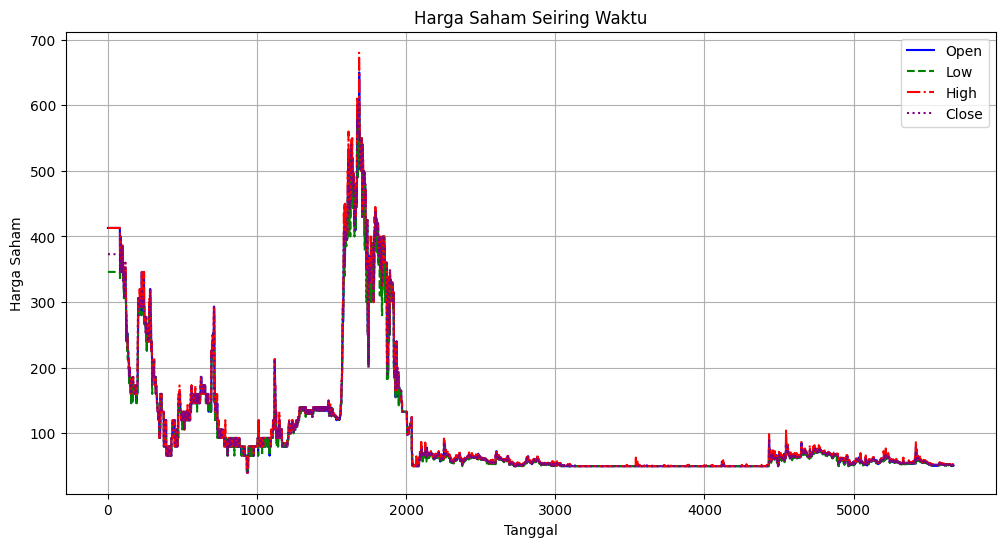

In [77]:
import matplotlib.pyplot as plt

# Ambil kolom timestamp sebagai indeks
data_plot.set_index('timestamp', inplace=True)

# Plot data harga saham
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['open'], label='Open', color='blue', linestyle='-')
plt.plot(data.index, data['low'], label='Low', color='green', linestyle='--')
plt.plot(data.index, data['high'], label='High', color='red', linestyle='-.')
plt.plot(data.index, data['close'], label='Close', color='purple', linestyle=':')

plt.title('Harga Saham Seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
data_train = pd.read_csv('data_normalized.csv')

In [79]:
X_train = data_train[['open', 'low', 'high', 'volume']].values
y_train = data_train['close'].values

In [80]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_steps = 1
n_features = 4
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [81]:
X_train = X_train.reshape(X_train.shape[0], n_steps, n_features)

In [82]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
62/62 [==============================] - 2s 5ms/step - loss: 0.0287
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 3.9115e-04
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 1.5548e-04
Epoch 5/100
62/62 [==============================] - 0s 5ms/step - loss: 1.4358e-04
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3850e-04
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3560e-04
Epoch 8/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3333e-04
Epoch 9/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3130e-04
Epoch 10/100
62/62 [==============================] - 0s 3ms/step - loss: 1.2920e-04
Epoch 11/100
62/62 [==============================] - 0s 3ms/step - loss: 1.2651e-04
Epoch 12/100
62/62 [==============================] - 0s 3ms/step - loss: 1.2511e-

In [93]:
# Menggunakan kolom numerik untuk normalisasi
data_numerik = data_validasi[['open', 'low','high', 'close', 'volume']]

In [120]:
data_timestamp = data_validasi[['timestamp']]

In [94]:
data_test = scaler.fit_transform(data_numerik)

In [101]:
data_test_df = pd.DataFrame(data_test, columns=['open', 'low','high', 'close', 'volume'])

In [103]:
X_test = data_test_df[['open', 'low', 'high', 'volume']].values
y_test = data_test_df['close'].values

In [105]:
from sklearn.metrics import mean_squared_error

# Melakukan prediksi pada data testing
X_test = X_test.reshape(X_test.shape[0], n_steps, n_features)
y_pred = model.predict(X_test)
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


27/27 [==============================] - 1s 7ms/step
Mean Squared Error (MSE): 0.0006081314458980187


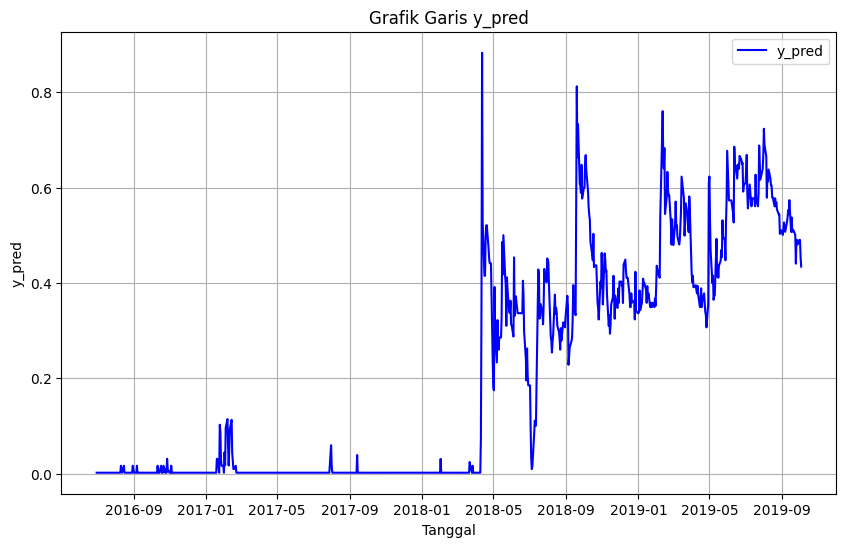

In [123]:
import matplotlib.pyplot as plt


# Membuat plot grafik garis
plt.figure(figsize=(10, 6))  # Ukuran grafik
plt.plot(data_timestamp, y_pred, label='y_pred', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('y_pred')
plt.title('Grafik Garis y_pred')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()


In [113]:
# Mengubah bentuk X_test menjadi dua dimensi
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Membuat DataFrame dari X_test dan kolom close (y_pred)
data_testing_df = pd.DataFrame(X_test_2d, columns=['open', 'low', 'high', 'volume'])
data_testing_df['close'] = y_pred

In [114]:
# Denormalisasi data testing (misalnya X_test)
X_test_denormalized = scaler.inverse_transform(data_testing_df)

In [116]:
data_testing_df

,open,low,high,volume,close
0,0.000000,0.000000,0.000000,3.440085e-07,0.001763
1,0.000000,0.000000,0.000000,0.000000e+00,0.001763
2,0.000000,0.000000,0.000000,0.000000e+00,0.001763
3,0.000000,0.000000,0.000000,0.000000e+00,0.001763
4,0.000000,0.000000,0.000000,0.000000e+00,0.001763
...,...,...,...,...,...
846,0.444444,0.600000,0.350877,3.698091e-04,0.480705
847,0.422222,0.600000,0.350877,2.131133e-04,0.490448
848,0.422222,0.600000,0.350877,2.664346e-03,0.490323
849,0.422222,0.566667,0.333333,6.379637e-03,0.453959


In [118]:
# Jika Anda menggunakan Jupyter Notebook
display(X_test_denormalized)

array([[5.00000000e+01, 5.00000000e+01, 5.00000000e+01, 5.00000134e+01,
        1.02472193e+06],
       [5.00000000e+01, 5.00000000e+01, 5.00000000e+01, 5.00000000e+01,
        1.02473276e+06],
       [5.00000000e+01, 5.00000000e+01, 5.00000000e+01, 5.00000000e+01,
        1.02473276e+06],
       ...,
       [6.90000000e+01, 6.80000000e+01, 7.00000000e+01, 5.01039095e+01,
        2.85064723e+08],
       [6.90000000e+01, 6.70000000e+01, 6.90000000e+01, 5.02488059e+01,
        2.63923321e+08],
       [6.90000000e+01, 6.60000000e+01, 6.90000000e+01, 5.00466150e+01,
        2.52477103e+08]])

In [129]:
from keras.models import load_model, save_model
model.save('saham_lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
